In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from DAPCA import DAPCA

In [2]:
X = np.loadtxt('datasets/synthetic/3clusters/2sticks_sheet/X.csv',delimiter=',')
labels = np.loadtxt('datasets/synthetic/3clusters/2sticks_sheet/labels.csv',delimiter=',')
Y = np.loadtxt('datasets/synthetic/3clusters/2sticks_sheet/Y.csv',delimiter=',')

/mnt/c/Users/jobac/Desktop/all/git/DAPCA/DAPCA.py:151: UserWarning: Since matrix Y is empty the SPCA is used
  warnings.warn("Since matrix Y is empty the SPCA is used")


Text(0.5, 1.0, 'SPCA through DAPCA, alpha=1')

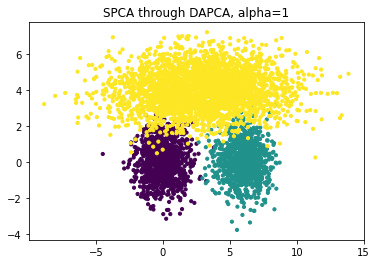

In [3]:
alpha = 1
[V1, D1, PX, PY] = DAPCA(X, labels, 2, alpha=alpha)
# Drawing
fig=plt.figure()
plt.scatter(PX[:,0], PX[:,1], 10, labels) 
plt.title(f'SPCA through DAPCA, alpha={alpha}')

Text(0.5, 1.0, 'SPCA through DAPCA, alpha=#4.2f, delta = [#4.2f,#4.2f,#4.2f]')

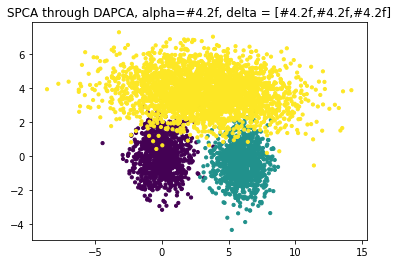

In [4]:
alpha = 1
delta = np.array([0.1, 0.2, 5])
[V2, D2, PXd, PYd] = DAPCA(X, labels, 2, alpha=alpha, delta=delta)
# Drawing
fig=plt.figure()
plt.scatter(PXd[:,0],PXd[:,1],10,labels) 
plt.title(f'SPCA through DAPCA, alpha=#4.2f, delta = {delta}')

(-4.0, 8.0)

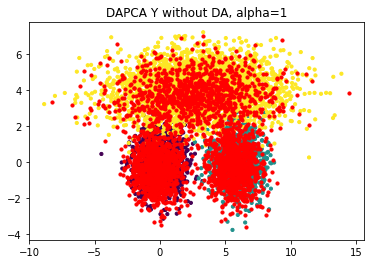

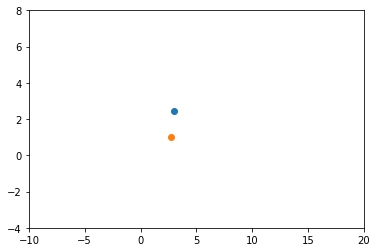

In [5]:
PY = Y @ V1
fig=plt.figure()
plt.scatter(PX[:,0], PX[:,1], 10, labels,) 
plt.scatter(PY[:,0],PY[:,1],10,'r') 
plt.title(f'DAPCA Y without DA, alpha={alpha}')

# Draw centroids
fig=plt.figure()
mi = np.mean(PX,0)
plt.scatter(mi[0],mi[1])
mi = np.mean(PY,0)
plt.scatter(mi[0],mi[1])
plt.xlim([-10, 20])
plt.ylim([-4, 8])


Text(0.5, 1.0, 'DAPCA Y without DA, alpha=#4.2f')

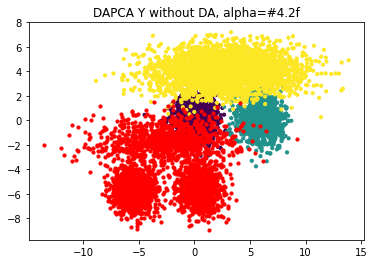

In [6]:
PY = (Y - 5) @ V1
fig=plt.figure()
plt.scatter(PX[:,0], PX[:,1], 10, c=labels,) 
plt.scatter(PY[:,0],PY[:,1],10,'r') 
plt.title(f'DAPCA Y without DA, alpha={alpha}')


Text(0.5, 1.0, 'DAPCA SY without DA, \\alpha=1.00 \\beta 0.50 \\gamma 0.001 iter 30 nNN 1')

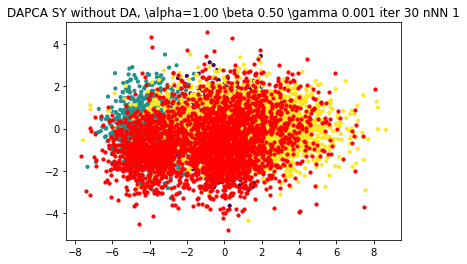

In [8]:
beta = 0.5
delta = 1
alpha = 1
gamma = 0.001
maxIter = 30
SY = Y - 5
kNN = 1
[V, D, PX, PY] = DAPCA(X, labels, Y=SY, nComp=2, alpha=alpha, beta=beta, gamma=gamma, maxIter=maxIter, kNN=kNN)
# Draw
fig=plt.figure()
plt.scatter(PX[:,0], PX[:,1], 10, c=labels) 
plt.scatter(PY[:,0],PY[:,1],10,'r') 
plt.title(f'DAPCA SY without DA, \\alpha={alpha:.2f} \\beta {beta:.2f} \\gamma {gamma:.3f} iter {maxIter} nNN {kNN}')

In [9]:
for maxIter in range(1,4):
    [V, D, PX, PY] = DAPCA(X, labels, Y=SY, nComp=2,alpha=alpha, beta=beta, gamma=gamma, maxIter=maxIter, kNN=kNN)

    if maxIter==1: 
        meanDist=np.sum((np.mean(PX,0,keepdims=1) - np.mean(PY,0,keepdims=1)) ** 2, 0,keepdims=1)
        PC1 = V[:, [0]]
        PC2 = V[:, [1]]
    else:
        meanDist = np.concatenate([meanDist, np.sum((np.mean(PX,0,keepdims=1) - np.mean(PY,0,keepdims=1)) ** 2, 0,keepdims=1)])
        PC1 = np.concatenate([PC1, V[:, [0]]],axis=1)
        PC2 = np.concatenate([PC2, V[:, [1]]],axis=1)

In [10]:
# Angles calculation
tmp = PC1.T @ PC1
tmp[tmp > 1] = 1
PC1a = np.rad2deg(np.arccos(tmp))
tmp = PC2.T @ PC2
tmp[tmp > 1] = 1
PC2a = np.rad2deg(np.arccos(tmp))

In [11]:
ang1 = np.rad2deg(np.arccos(V[:, [0]].T @ PC1[:, [0]]))
ang2 = np.rad2deg(np.arccos(V[:, [1]].T @ PC2[:, [0]]))
mDist = np.sum((np.mean(PX,0,) - np.mean(PY,0,)) ** 2,0)